In [1]:
cd ..

/Users/newuser/Desktop/Research/Metis/prework/ThinkStats2/code


In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import thinkstats2
import thinkplot
import nsfg
preg = nsfg.ReadFemPreg()
import chap01soln
resp = chap01soln.ReadFemResp()

## Q1. [Think Stats Chapter 2 Exercise 4](statistics/2-4-cohens_d.md) (effect size of Cohen's d)  
Cohen's D is an example of effect size.  Other examples of effect size are:  correlation between two variables, mean difference, regression coefficients and standardized test statistics such as: t, Z, F, etc. In this example, you will compute Cohen's D to quantify (or measure) the difference between two groups of data.   

You will see effect size again and again in results of algorithms that are run in data science.  For instance, in the bootcamp, when you run a regression analysis, you will recognize the t-statistic as an example of effect size.

**Exercise 2.4** Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [15]:
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

In [17]:
firsts.prglngth.mean()

38.60095173351461

In [19]:
others.prglngth.mean()

38.52291446673706

In [20]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [21]:
others.totalwgt_lb.mean()

7.325855614973262

In [22]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

**Solution**
1. The first babies are lighter than others on average.
2. Cohen’s d is -0.089
3. Compared with the difference in pregnancy length, the difference in babies weight is more statistically significant.

## Q2. [Think Stats Chapter 3 Exercise 1](statistics/3-1-actual_biased.md) (actual vs. biased)
This problem presents a robust example of actual vs biased data.  As a data scientist, it will be important to examine not only the data that is available, but also the data that may be missing but highly relevant.  You will see how the absence of this relevant data will bias a dataset, its distribution, and ultimately, its statistical interpretation.

**Exercise 3.1** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.
Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

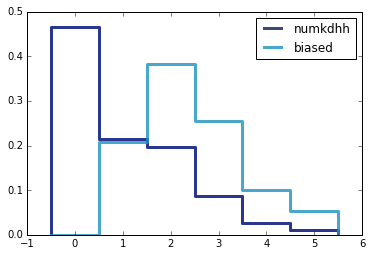

In [24]:
pmf = thinkstats2.Pmf(resp.numkdhh)
thinkplot.Pmf(pmf, label='numkdhh')
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

biased = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Show()

## Q3. [Think Stats Chapter 4 Exercise 2](statistics/4-2-random_dist.md) (random distribution)  
This questions asks you to examine the function that produces random numbers.  Is it really random?  A good way to test that is to examine the pmf and cdf of the list of random numbers and visualize the distribution.  If you're not sure what pmf is, read more about it in Chapter 3.  

**Exercise 4.2** The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

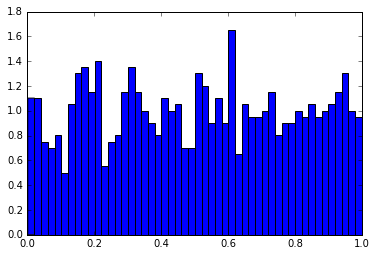

In [68]:
from random import random 
unif = [random() for _ in range(1000)]
#pdf
plt.hist(unif, 50, normed = True)
plt.show()

/Users/newuser/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


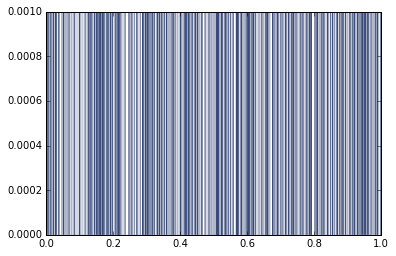

In [72]:
#We treat this problem as discrete uniform distribution and plot pmf
pmf = thinkstats2.Pmf(unif)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Show()

/Users/newuser/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


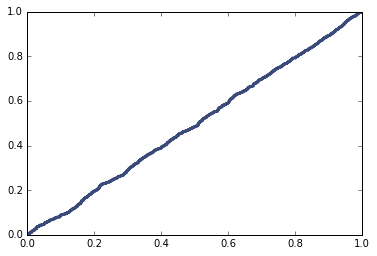

In [69]:
cdf = thinkstats2.Cdf(unif)
thinkplot.Cdf(cdf)
thinkplot.Show()

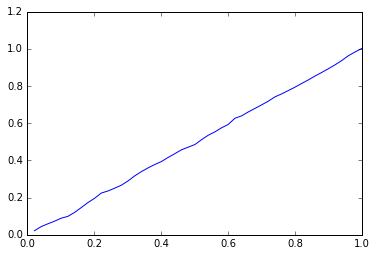

In [73]:

# Use the histogram function to bin the data
num_bins = 50
counts, bin_edges = np.histogram(unif, bins=num_bins, normed=True)

# Now find the cdf
cdf = np.cumsum(counts)/num_bins

# And finally plot the cdf
plt.plot(bin_edges[1:], cdf)

plt.show()

## Q5. Bayesian (Elvis Presley twin) 

Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way.  It helps incorporate conditional probabilities into our conclusions.

Elvis Presley had a twin brother who died at birth.  What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

**Solution**
Let $X$ be the event that Elvis was an identical twin. Let $Y$ be the event that Elvis was a twin.

$$P(X|Y) = \frac{P(X)}{P(Y)} = \frac{1/125}{1/125 + 1/300} = 0.706$$

## Q6. Bayesian &amp; Frequentist Comparison  
How do frequentist and Bayesian statistics compare?


**Solution**
Frequentist:
* Data are from repeatable random sample.
* Underlying parameters remain constant during this repeatable process.
* A probability is assigned to a hypothesis

Bayesian:
* Data are observed from the realized sample.
* Parameters are unknown and described probabilistically.
* A hypothesis is typically tested without being assigned a probability.